## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from analysis_functions import plot_spatial_distribution, plot_density_heatmap, analyze_nearest_neighbor_distances

sns.set_style("whitegrid")

## Load data

In [14]:
run_dir = Path("../run_20251121_161752")
global_df = pd.read_parquet(run_dir / "global_metrics.parquet")
creatures_df = pd.read_parquet(run_dir / "creature_snapshots.parquet")
plants_df = pd.read_parquet(run_dir / "plant_positions.parquet")

print(f"Loaded {len(global_df)} global metrics")
print(f"Loaded {len(creatures_df)} creature snapshots")

Loaded 17361 global metrics
Loaded 317774 creature snapshots


## Population trends

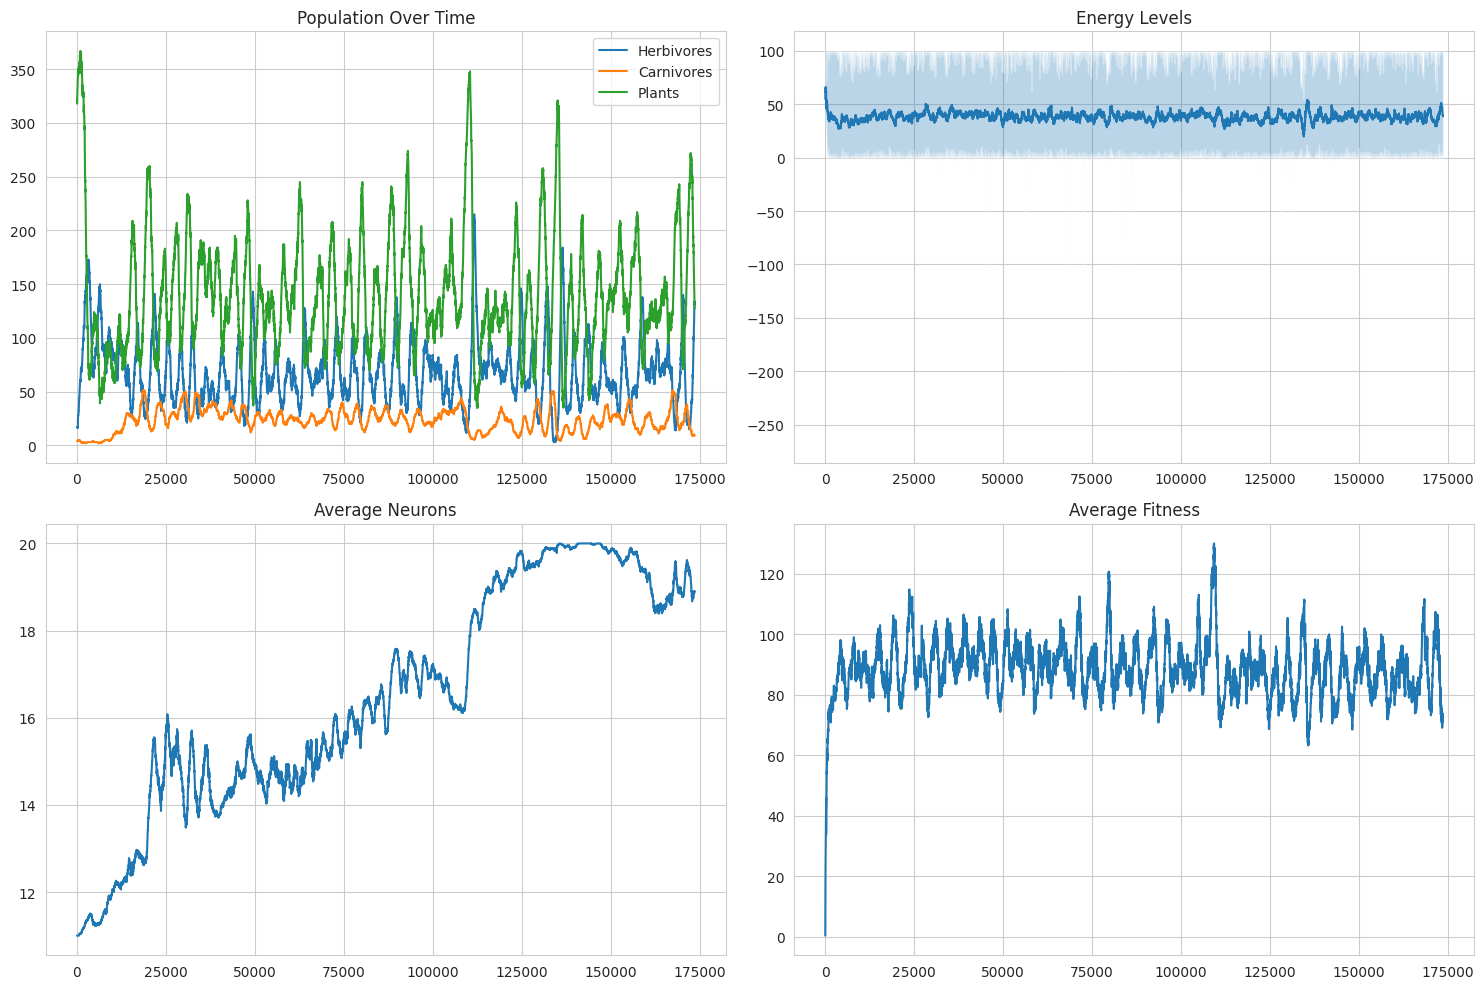

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Population counts
axes[0, 0].plot(global_df['frame'], global_df['herbivore_count'], label='Herbivores')
axes[0, 0].plot(global_df['frame'], global_df['carnivore_count'], label='Carnivores')
axes[0, 0].plot(global_df['frame'], global_df['plant_count'], label='Plants')
axes[0, 0].set_title('Population Over Time')
axes[0, 0].legend()

# Energy levels
axes[0, 1].plot(global_df['frame'], global_df['avg_energy'])
axes[0, 1].fill_between(global_df['frame'], global_df['min_energy'], 
                          global_df['max_energy'], alpha=0.3)
axes[0, 1].set_title('Energy Levels')

# Neural complexity
axes[1, 0].plot(global_df['frame'], global_df['avg_neurons'])
axes[1, 0].set_title('Average Neurons')

# Fitness
axes[1, 1].plot(global_df['frame'], global_df['avg_fitness'])
axes[1, 1].set_title('Average Fitness')

plt.tight_layout()
plt.show()

## Creature Distribution by Generation

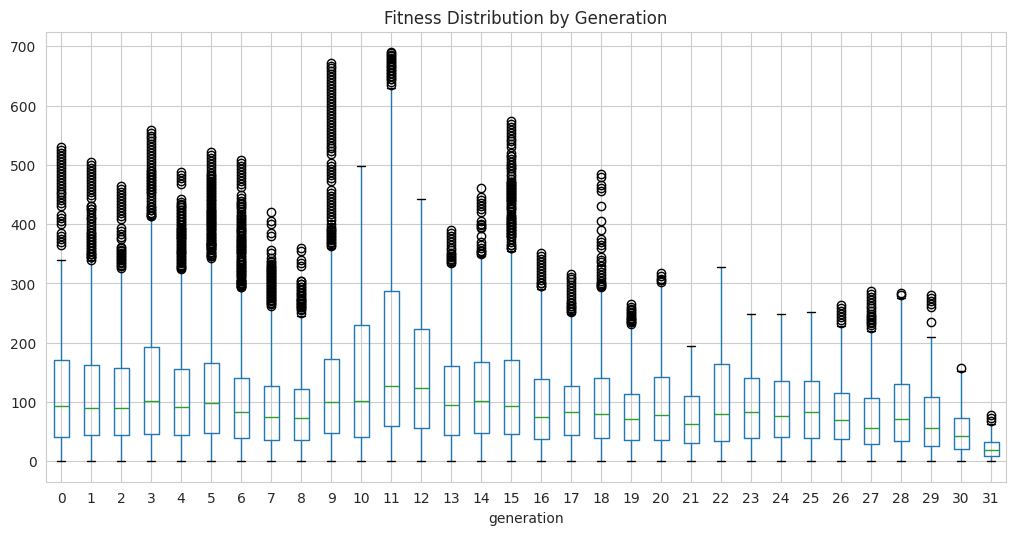

In [6]:
creatures_df.boxplot(column='fitness', by='generation', figsize=(12, 6))
plt.title('Fitness Distribution by Generation')
plt.suptitle('')
plt.show()

## Spatial Analysis

In [ ]:
print("\n" + "="*70)
print("SPATIAL BOTTLENECK ANALYSIS - CRITICAL FRAMES")
print("="*70 + "\n")

# Define critical frames based on your data
critical_frames = {
    1000: "Early Stable Phase",
    3000: "🔴 FIRST MAJOR CRASH",
    5000: "Recovery Phase 1",
    10000: "Mid-Simulation Stability",
    13000: "Peak Population",
    15500: "🧠 Peak Neural Complexity",
    16000: "🔴 CATASTROPHIC COLLAPSE",
    17000: "🔴 Carnivore Extinction Event",
    18000: "Neural Complexity Crash",
    19000: "Recovery Attempt",
    20050: "Latest Frame"
}

# Generate all spatial plots
for frame, description in critical_frames.items():
    print(f"\n{'='*70}")
    print(f"Analyzing Frame {frame}: {description}")
    print('='*70)
    
    # Check if frame exists in data
    available_frames = creatures_df['frame'].unique()
    closest_frame = min(available_frames, key=lambda x: abs(x - frame))
    
    if abs(closest_frame - frame) > 100:
        print(f"⚠️  Frame {frame} not found. Closest: {closest_frame}")
        continue
    
    if closest_frame != frame:
        print(f"ℹ️  Using closest frame: {closest_frame}")
        frame = closest_frame
    
    # Generate plots
    plot_spatial_distribution(frame, plants_df, creatures_df, global_df, f" - {description}", show_vision=True)
    plot_density_heatmap(frame, plants_df, creatures_df, global_df, f" - {description}")
    analyze_nearest_neighbor_distances(frame, plants_df, creatures_df)

print("\n" + "="*70)
print("ANALYSIS COMPLETE - All spatial plots generated!")
print("="*70)